# Tarea 1 Bioinformática


## Introducción

El objetivo del análisis es buscar secuencias de proteínas homólogas a las proteínas CHRM1, CHRNA3 y CHRNA7 de humanos. Estas proteínas se encuentran en los receptores de acetilcolina en neuronas de vertebrados. El primero en un receptor muscarínico mientras que los dos últimos son subunidades parálogas del receptor nicotínico. Parece ser que estas proteínas aparecieron en el ancestro común entre los cordados y los cnidarios.

## Métodos

La base de datos utilizada para hacer el análisis va a ser Swissprot, que es una base de datos proteica que ya está instalada en el JupyterLab.

Para realizar las comparaciones utilizaré blastp, que es una herramienta muy útil para el alineamiento de proteínas y encontrar homologías entre ellas. Se utilizarán diferentes valores de E para estudiar cómo varían las secuencias homólogas encontradas con diferentes grados de similitud exigidos.

## Resultados

### BLASTP individual

En este análisis se estudian los resultados del alineamiento de diferentes secuencias con cada una de las tres proteínas humanas con un valor de E de 1.0e-50, que es el menor posible porque es muy exigente. Solo aparecerán en el resultado las secuencias que sean muy parecidas a las query.

In [4]:
# Antes de comenzar a hacer los análisis es necesario preparar el ambiente (descargar BLAST y descomprimir el archivotaxdb.btd.gz)
system2(command = './preparar_ambiente.sh', wait = TRUE)

In [5]:
# Primero se hará el análisis con la proteína CHRM1
Blastp01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# Para visualizar los datos anteriores en forma de tabla se utiliza la función read.table:
Tabla01 <- read.table(textConnection(Blastp01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

# Y finalmente se podrá observar la tabla con los resultados del alineamiento
Tabla01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


En la tabla se observa que con un valor de E muy bajo hay 37 proteínas con un grado de homología con la proteína CHRM1 muy alta. En concreto, hay 5 proteínas (aparte de la original) que tienen más del 98% de homología, lo que indica que son prácticamente iguales y no se han diferenciado casi nada. Entre ellas hay dos de primates, una de artiodáctilos y dos de roedores.

In [6]:
# A continuación se hace lo mismo con las otras dos proteínas, CHRNA3 y CHRNA7

#Los resultados para CHRNA3 son:
Blastp02 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA3.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

Tabla02 <- read.table(textConnection(Blastp02),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Tabla02

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P32297.4,100.000,505,1,505,1,505,0.00e+00,9606,Homo sapiens,primates
Q07263.1,95.825,479,27,505,17,495,0.00e+00,9913,Bos taurus,even-toed ungulates
Q8R4G9.1,92.886,492,14,505,8,499,0.00e+00,10090,Mus musculus,rodents
P04757.1,92.308,494,12,505,6,499,0.00e+00,10116,Rattus norvegicus,rodents
P09481.2,85.232,474,31,504,22,495,0.00e+00,9031,Gallus gallus,birds
P18845.1,68.885,511,13,501,3,509,0.00e+00,7957,Carassius auratus,bony fishes
P49581.1,65.145,482,20,501,19,492,0.00e+00,9031,Gallus gallus,birds
Q15825.1,67.653,473,34,501,33,489,0.00e+00,9606,Homo sapiens,primates
Q5IS76.1,67.442,473,34,501,33,489,0.00e+00,9598,Pan troglodytes,primates


Los resultados de la tabla muestran que hay una gran cantidad de secuencias que son extremadamente parecidas a la proteína CHRNA3 de humanos, muchas más que en CHRM1 a pesar de que no haya ninguna con una similitud tan alta como alguna de la proteína CHRM1.
Esto significa que la proteína CHRNA3 ha divergido mucho menos que la anterior y no ha evolucionado tanto conforme evolucionaba cada especie.

In [7]:
#Los resultados para CHRNA7 son:
Blastp03 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA7.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

Tabla03 <- read.table(textConnection(Blastp03),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Tabla03

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


Las conclusiones de el análisi con la proteína CHRNA7 son muy parecidos a los de la proteína CHRNA3: esta proteína no ha evolucionado tanto como la primera en las especies a partir de las cuales divergieron el linaje de los humanos con los de los cnidarios. Por eso se ve que hay muchas especies con proteínas con gran similitud con la CHRNA7 de humanos.

### BLASTP en serie

A continuación se hará el mismo análisis que en el apartado anterior pero variando el valor de E. Conforme vaya aumentando el valor de E el resultado del alineamiento será cada vez menos exigente y las secuencias resultantes no serán tan similares a las secuencias de las proteínas CHRM1, CHRNA3 y CHRNA7. De esta forma, podremos ir viendo proteínas parecidas a las query pero que han ido variando con el tiempo.

Para ello se utilizará la función lapply para cada proteína, que hace la búsqueda de forma automática.

In [8]:
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

En primer lugar se hará el análisis completo para la **proteína CHRM1**

In [9]:
Lista_de_Tablas1 <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Con la función de lapply se habrá construido una tabla de blastp con cada uno de los valores de E. A continuación se muestra el final de la tabla 1, que tiene un valor de E de 1.0e-50:

In [10]:
tail(Lista_de_Tablas1[[1]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
32,Q920H4.2,74.882,211,20,230,25,235,9.45e-110,10090,Mus musculus,rodents
33,P16395.2,53.061,245,12,251,87,323,3.30e-77,7227,Drosophila melanogaster,flies
34,Q9U7D5.2,50.000,208,24,230,64,271,1.08e-66,6239,Caenorhabditis elegans,nematodes
35,Q9JI35.2,33.333,408,39,433,49,427,4.11e-55,10141,Cavia porcellus,rodents
36,Q93126.1,29.451,455,30,444,38,458,1.06e-54,1232801,Amphibalanus amphitrite,crustaceans
37,Q64264.2,28.899,436,6,437,18,419,3.47e-51,10090,Mus musculus,rodents


Para saber cuántas secuencias homólogas encontradas hay con cada valor de E se utiliza la función dim, que muestra las dimensiones de la tabla. Se escogerá solo que muestre el número de filas. A continuación se construirá la tabla donde muestre el número de resultados frente a los valores de E utilizados.

[1]  37  53  94 249 485 577 647 682 730 774

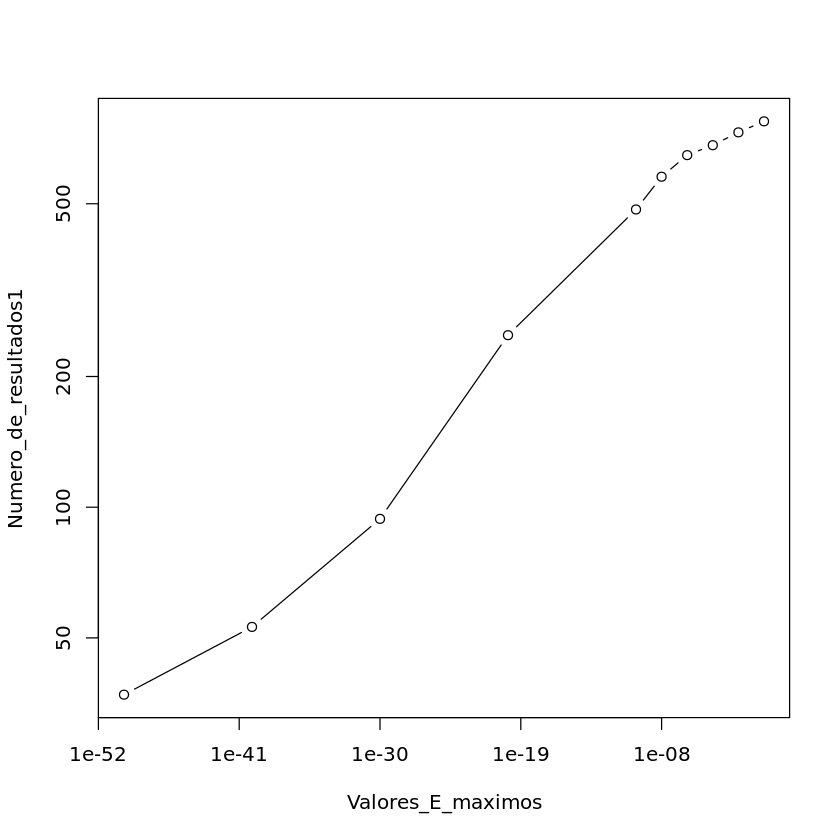

In [11]:
Numero_de_resultados1 <- sapply(Lista_de_Tablas1, function(x) dim(x)[1])
Numero_de_resultados1

plot(Valores_E_maximos, Numero_de_resultados1, log = 'xy', type = 'b')

Los resultados mustran las secuencias que se han alineado con la proteína CHRM1 pero no cuál es la longitud del alineamiento. Para ello utilizamos la siguiente función para la última tabla (tabla 10) ya que es la que más resultados tiene:

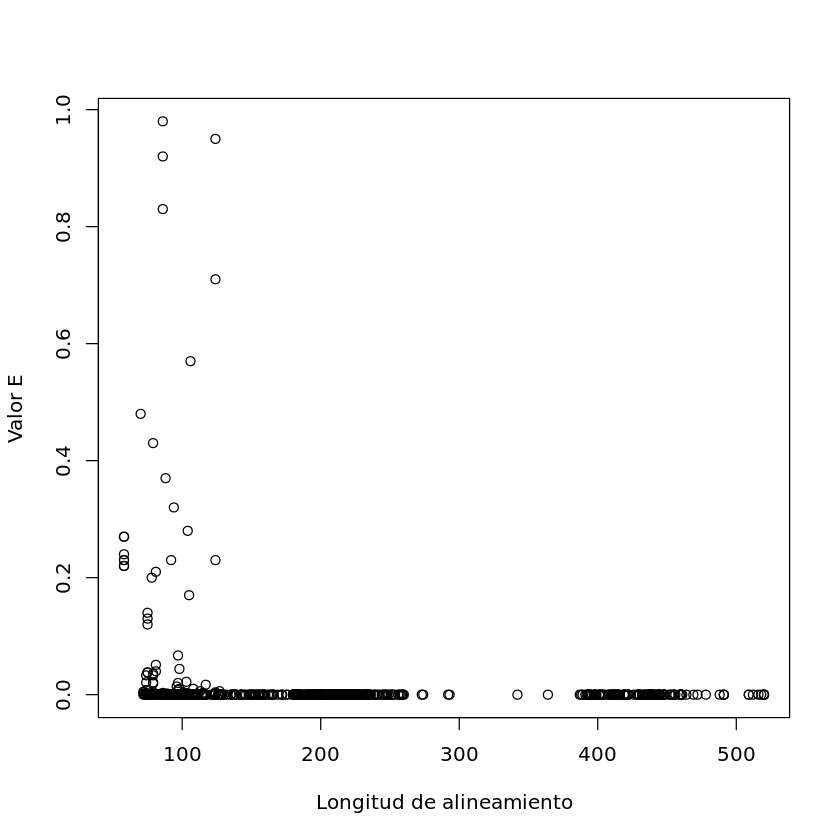

In [12]:
plot(Lista_de_Tablas1[[10]]$length, Lista_de_Tablas1[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

La proteína CHRM1 tiene unos 460 aminoácidos y hay resultados del alineamiento que solo lo hacen en unos 100 aminoácidos. Por tanto, solo estarán alineados parcialmente por un fragmento de la proteína, lo que indica que debe haber evolucionado bastante a lo largo del tiempo.

Para saber qué regiones de la proteína son en las que se ha producido ese alineaminto parcial utilizaremos las siguientes funciones:

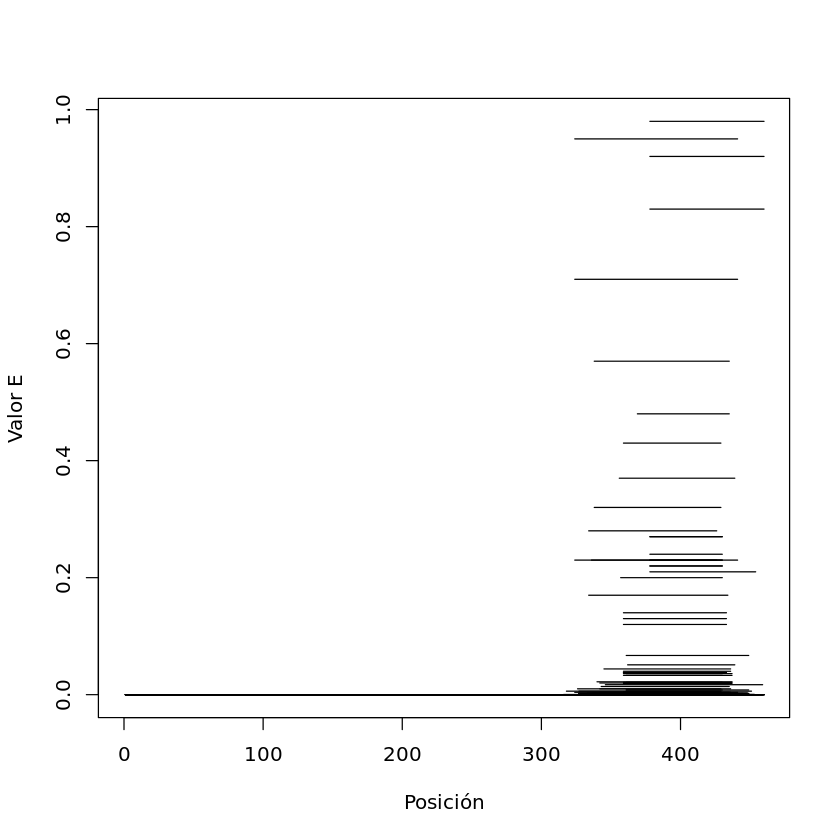

In [13]:
inicios <- Lista_de_Tablas1[[10]]$qstart
finales <- Lista_de_Tablas1[[10]]$qend
valoresE <- Lista_de_Tablas1[[10]]$evalue

AlineamientoMaximo <- max(Lista_de_Tablas1[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

El resultado muestra que en efecto hay un fragmento de la proteína CHRM1 que está entre los 300-450 aminoácidos en el que se se alinean las secuencias homólogas encontradas. Ese fragmento indicará una región conservada de la proteína.

Para finalizar el análisis se estudiará la distribución taxonómica del resultado de las secuencias homólogas a CHRM1 con cada uno de los valores de E utilizados. La tabla 1 será la que tenga un valor de E más bajo y la 10 más alto.

In [14]:
lapply(Lista_de_Tablas1, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

La proteína CHRM1 está muy conservada entre las especies ya que aparece en muchos grupos taxonómicos después del ancestro común entrelos cordados y los cnidarios. Por ejemplo en las primeras tablas aparecen en grupos taxonómicos muy variados como pájaros, nemátodos, primates, etc. Cabe destacar que la mayoría de especies en las que aparece son cordados por lo que se podría pensar que esta familia proteica surgió a partir de este linaje, pero como aparece una especie de crustáceos en la tabla 1 ya no se podría afirmar.

Conforme el valor de E aumenta los grupos taxonómicos en los cuales se ha encontrado homología con esta proteína de humanos también aumenta. A partir de la tabla 5 se observa por ejemplo que hay homologías en virus. Puede ser debido a una infección en la que se han incorporado genes por transferencia horizontal y han pasado a formar parte de esos virus.

Aparte de la homología con virus no hay más grupos taxonómicos que en principio sería extraño que hubiera cierta homología con la proteína CHRM1 por lo que no ha habido más fenómenos de transferencia de material genético durante la evolución.

Por último, se va a repetir el análisis anterior pero solo con las secuencias resultantes que tengan al menos 300 aminoácidos de homología con CHRM1 porque en teoría deberían ser aquellas que tienen la misma o una función similar a CHRM1.

In [15]:
lapply(Lista_de_Tablas1, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

Como cabía esperar, hay muchos grupos taxonómicos que no tienen un alineamiento de más de 300 aminoácidos con CHRM1, por lo que puede que conserven un fragmento de la proteína pero no la función que tiene en humanos. El número va disminuyendo conforme va aumentando el valor de E, lo que confirma que a mayor valor de E el alineamiento no es tan estricto y hay más diferencias entre las proteínas.

A primera vista se esperaría encontrar también algún grupo taxonómico de cnidarios, ya que esta familia de proteínas apareció en el último ancestro común entre cnidarios y cordados. Para asegurarnos, se hará un blastp específico en la página del NCBI cuya *query* será la proteína CHRM1 frente a los cnidarios.

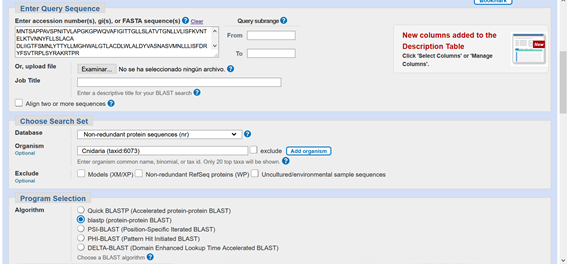

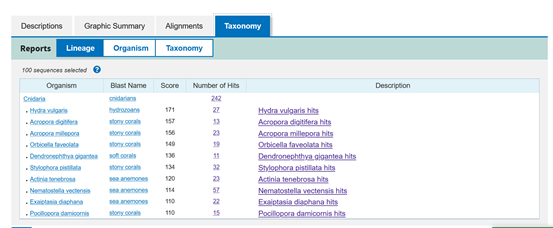

Las bases de datos de las que se han extraído la información son más extensas que Swissprot aunque no tan fiables. Se han encontrado 100 secuencias homólogas a CHRM1 pertenecientes a los cnidarios por lo que se puede considerar que esta proteína sí que se encuentra en los cnidarios.

En segundo lugar, se repetirá el análisis anterior con la proteína **CHRNA3** pero solo repetiré los pasos clave o aquellos de los que se pueda extraer mejor información para evitar que la tarea sea demasiado extensa.

Primero se estudiará el resultado del alineamiento con secuencias de otras proteínas a diferentes valores de E.

In [16]:
Lista_de_Tablas2 <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA3.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

[1] 118 124 130 131 183 200 234 246 258 263

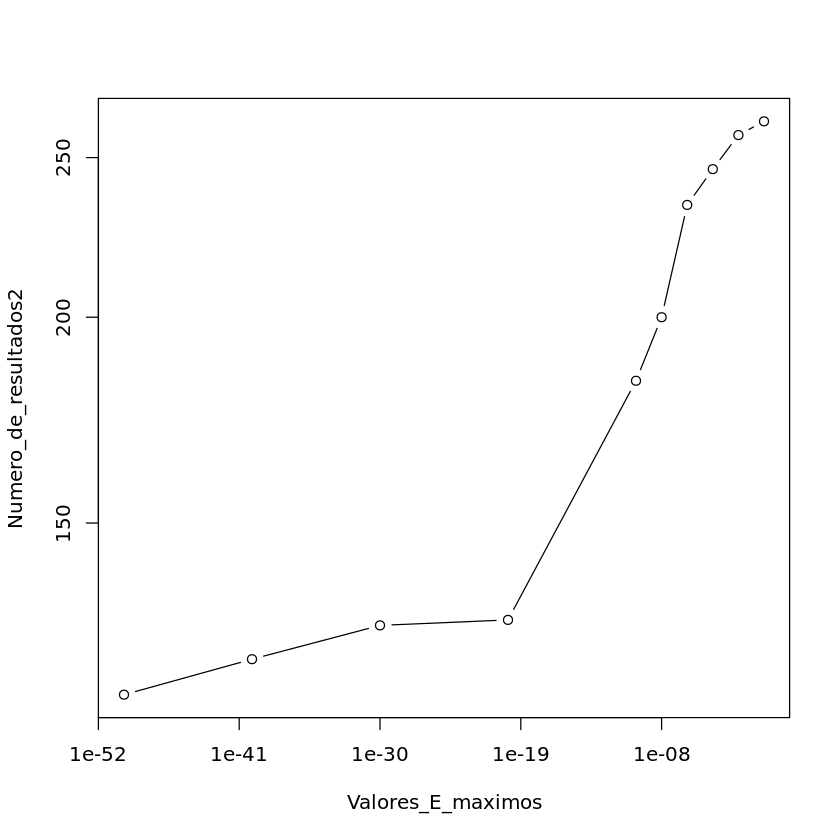

In [17]:
Numero_de_resultados2 <- sapply(Lista_de_Tablas2, function(x) dim(x)[1])
Numero_de_resultados2

plot(Valores_E_maximos, Numero_de_resultados2, log = 'xy', type = 'b')

Como cabría esperar, a mayor valor de E más secuencias homólogas encontradas porque el alineamiento no será tan estricto como a valores bajos de E. A pesar de ello, hasta el valor de E de 1e-19 no hay mucha variación entre las secuencias alineadas encontradas.

A continuación se hará un análisis para estudiar la longitud del alineamiento en cada una de las secuencias.

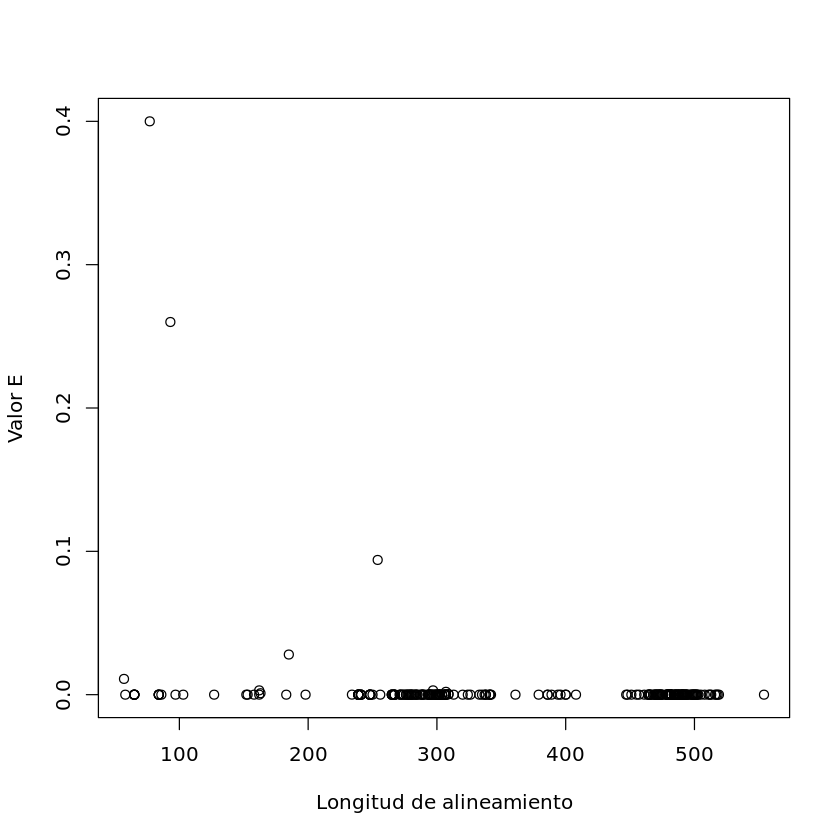

In [18]:
plot(Lista_de_Tablas2[[10]]$length, Lista_de_Tablas2[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

La proteína CHRNA3 tiene alrededor de 505 aminoácidos. En este caso también se observa que ha habido secuencias de otras proteínas que se han alineado con ella con una región de unos 100 aminoácidos. Este resultado podría deberse a que se ha perdido o modificado una parte de la proteína y no tendrá la misma función que la proteína homóloga humana. A pesar de ello la mayoría de alineamientos es de al menos unos 300 aminoácidos.

A continuación se comprobará si la región de alineamiento con CHRNA3 es la misma en todas las proteínas o hay alguna diferencia.

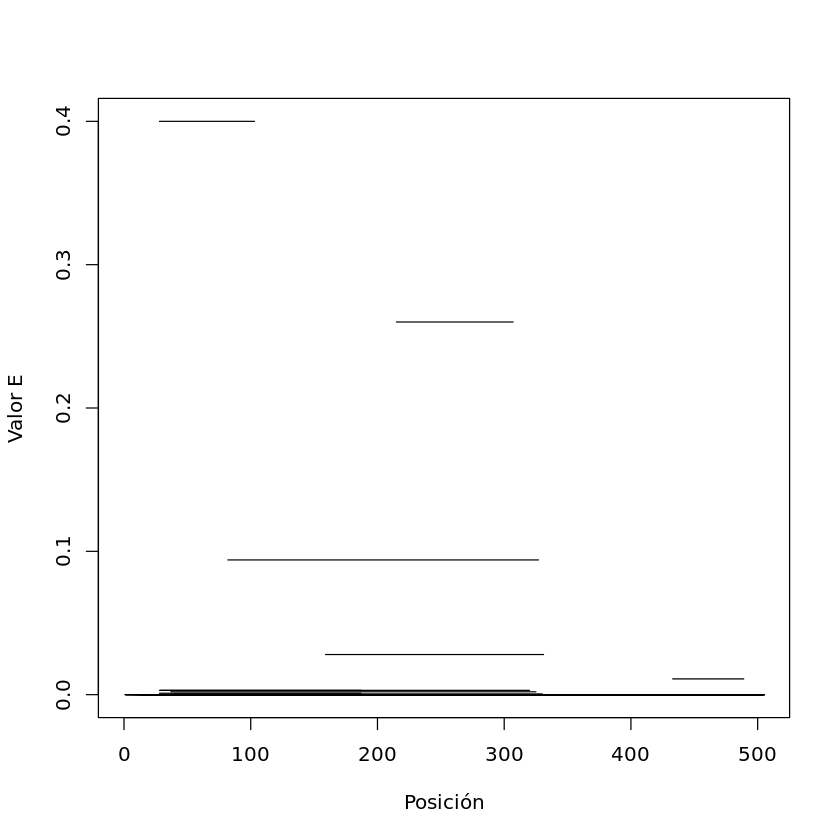

In [19]:
inicios <- Lista_de_Tablas2[[10]]$qstart
finales <- Lista_de_Tablas2[[10]]$qend
valoresE <- Lista_de_Tablas2[[10]]$evalue

AlineamientoMaximo <- max(Lista_de_Tablas2[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

En la tabla anterior se obsserva que el alineamiento se ha producido en casi todas las secuencias entre el aminoácido 50 y el 300 aproximadamente por lo que tendrán una región conservada. Hay dos alineamientos que no se encuentran en esta región: uno entre el aminoácido 50 hasta el 100 y otro entre el 450 y el 500. Puede ser debido a que conservan otra función de la proteína CHRNA3 o que se ha alineado una proteína muy parecida pero no es la homóloga a CHRNA3.

Finalmente, se realizará el análisis de las secuencias resultantes del alineamiento por taxones.

In [20]:
lapply(Lista_de_Tablas2, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  31                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 19                  24                  33                   5 

[[3]]

     

Al contrario que en la proteína CHRM1, en esta ocasión se encuentran entre estas tablas tres taxones que tengan alguna proteína que se pueda alinear con CHRNA3 que sean extraños. En concreto, son los taxones de ascomicetos, cianobacterias y enterobacterias encontrados en la tabla 10, la que tiene un mayor valor de E. Las bacterias podría deberse a un fenómeno de transferencia horizontal de genes.

Finalmente se repite el análisis anterior pero en los resultados solo obtendremos resultados de al menos 300 aminoácidos de alineamiento con CHRNA3

In [21]:
lapply(Lista_de_Tablas2, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  31                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 19                  24                  33                   5 

[[3]]

     

El resultado es el esperado, a mayor valor de E menos proporción de secuencias encontradas con un alineamiento de al menos 300 aminoácidos. Los alineamientos encontrados en la tabla 1 (la que tiene menor valor de E) son las que mayor proporción de secuencias más grandes alineadas con la secuencia de CHRNA3, por lo que serán las que menos habrán evolucionado y tendrán una función más similar a ella.

En tercer lugar se realizará el mismo análisis que los anteriores pero con la **proteína CHRNA7**.

In [22]:
Lista_de_Tablas3 <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA7.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

[1] 120 123 129 129 160 171 191 221 252 265

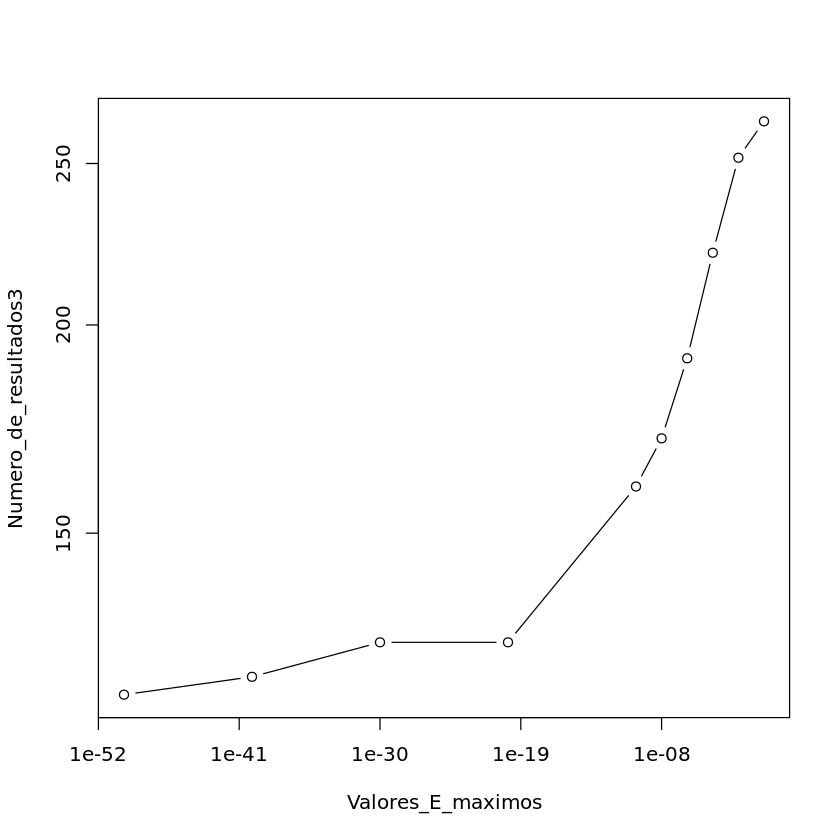

In [23]:
Numero_de_resultados3 <- sapply(Lista_de_Tablas3, function(x) dim(x)[1])
Numero_de_resultados3

plot(Valores_E_maximos, Numero_de_resultados3, log = 'xy', type = 'b')

El resultado del alineamiento a diferentes valores de E muestra que el número de secuencias resultantes de cada uno es prácticamente igual al de la proteína CHRNA3. En los siguientes análisis se comprobará si es por una simple coincidencia o no porque podría darse el caso de que el número de secuencias fuese similar pero las proteínas y las especies de las que provienen no son las mismas. 

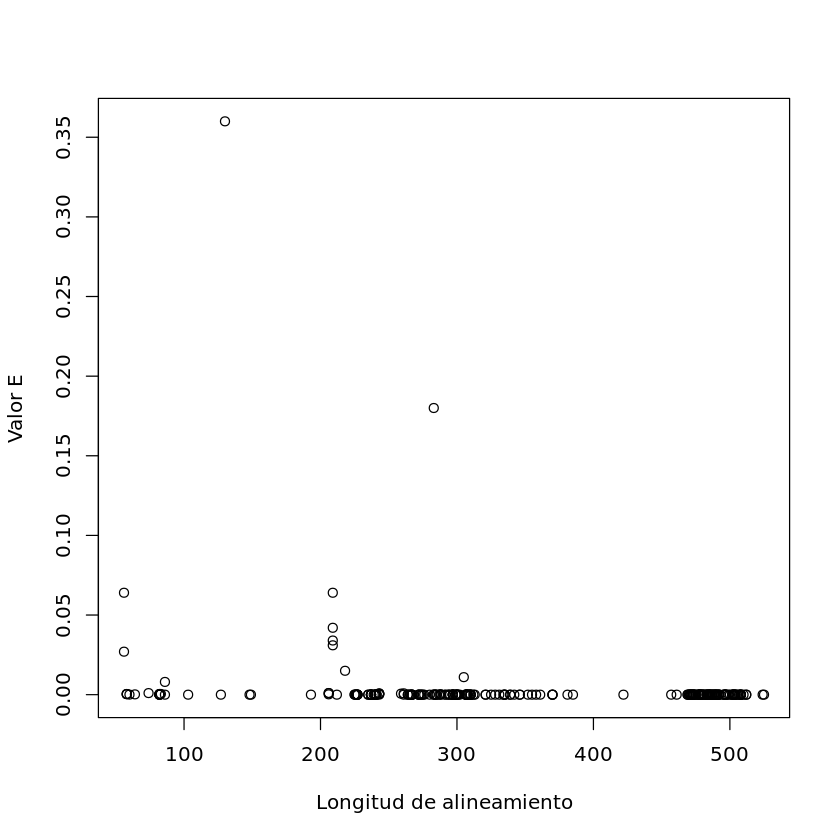

In [24]:
plot(Lista_de_Tablas3[[10]]$length, Lista_de_Tablas3[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

La secuencia de CHRNA7 es de de 502 aminoácidos y en este caso también hay proteínas que se alinean con ella con una región de unos 100 aminoácidos aunque la mayoría es tiene una región de alineamiento de 300 o 500 aminoácidos.

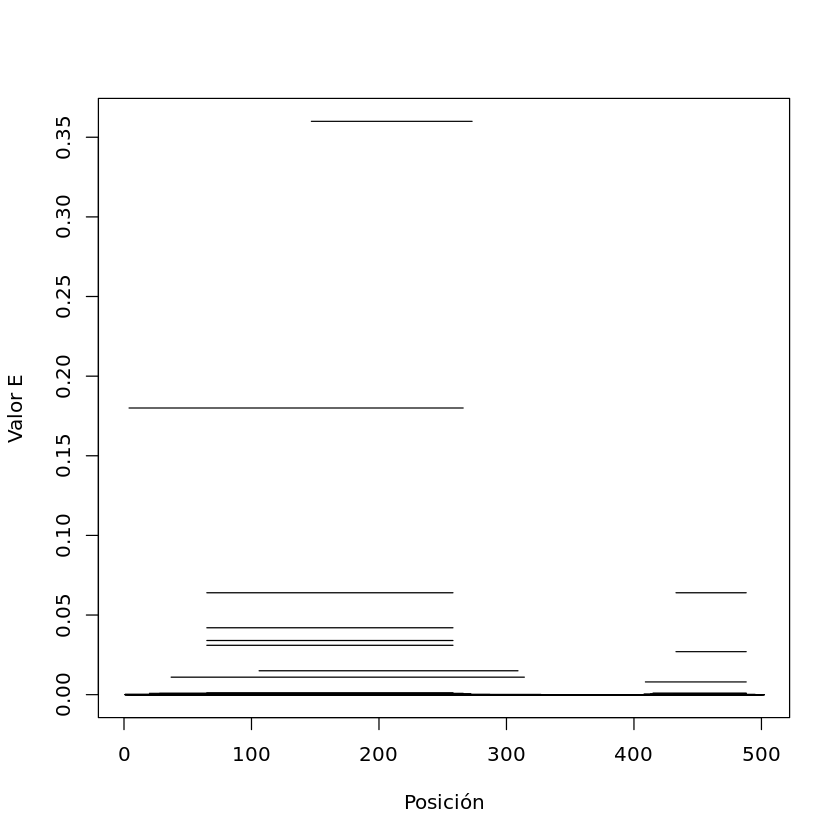

In [25]:
inicios <- Lista_de_Tablas3[[10]]$qstart
finales <- Lista_de_Tablas3[[10]]$qend
valoresE <- Lista_de_Tablas3[[10]]$evalue

AlineamientoMaximo <- max(Lista_de_Tablas3[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

La mayoría de seceuncias alineadas está en la misma región de CHRNA7, entre el aminoácido 50 y el 300 por lo que habrá una región que esté bastante conservada entre todas las proteínas de las especies encontradas que alinean con CHRNA7. A pesar de ello hay varias especies que alinean entre el aminoácido 400 y el 500. Podrían pertenecer a especies que han divergido pronto del linaje y han conservado un fragmento de la proteína pero tiene una función diferente.

Finalmente se realizará el estudio de las secuencias que alinean con CHRNA7 encontradas por taxones.

In [26]:
lapply(Lista_de_Tablas3, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

El apecto más destacado de este análisis es que los taxones en los que se han encontrado secuencias que se alinean con CHRNA7 son prácticamente los mismos que en CHRNA3. Por tanto se confirma que no es una coincidencia y que lasdos proteínas deben estar unidas o participan en la misma función.

Por otra parte también cabe destacar la aparición de proteínas provenientes de ascomicetos, enterobacterias y cianobacterias que se alineen con la proteína de humanos CHRNA7.

In [27]:
lapply(Lista_de_Tablas3, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

Exactamente igual en los casos anteriores a al realizar el análisis de los alineamientos obtenidos de al menos 300 aminoácidos se obtiene que a menor valor de E mayor proporción de secuencias encontradas respecto a las originales (sin restricción en cuanto al número de aminoácidos). En la tabla 10, al contrario, hay muchas más especies que no tienen secuencias de al menos 300 aminoácidos de alineamiento con CHRNA7.

## Discusión ##

Tras el análisis realizado con tres proteínas de *Homo sapiens*, CHRM1, CHRNA3 y CHRNA7, utilizándolas como *query* en búsquedas blastp, la primera conclusión que se puede extraer a simple vista es que las tres tienen gran cantidad de proteínas homólogas en especies de eucariotas que se originaron tras la divergencia del linaje de los humanos con los cnidarios. Si se presta atención a los taxones en los que se han encontrado alguna proteína homóloga a una de las *query* con un valor de E de 1.0e-50, se observa que los taxones que aparecen en las proteínas CHRNA3 y CHRNA7 son exactamente los mismos, y los que aparecen en CHRM1 son casi los mismos a los dos anteriores. Conforme la E va aumentando empiezan a haber algunas diferencias, especialmente en los taxones que no pertenecen a la rama que diverge de los cnidarios (bacterias o virus por ejemplo).

Los resultados anteriores demuestran las conclusiones obtenidas por Viscardi *et. al* (2021), que las tres proteínas proceden del último ancestro común entre cordados y cnidarios. Aparte de los resultados obtenidos mediante los blastp, que demuestran que se encuentra en cnidarios, cordados y artrópodos entre otros taxones, Cardoso *et. al* (2012) encontraron evidencias de esta familia de proteínas en nemátodos. Además, las proteínas parálogas CHRNA3 y CHRNA7 han evolucionado juntas y por eso las proteínas homólogas encontradas pertenecen a los mismos taxones. La proteína CHRM1 debe participar en los mismos procesos que las dos anteriores pero no ha evolucionado exactamente de la misma manera porque tiene algunas diferencias en los taxones con proteínas homólogas a ellas encontrados.

Otra conclusión que se puede extraer del análisis es que las tres proteínas poseen dominios conservados. Esto puede ser debido a que han ido evolucionando pero han mantenido su función original en la mayoría de los casos. Haciendo un análisis de cada uno de ellos en Pfam, se encuentra que CHRM1 pertenece a la familia de receptores transmembrana de la familia de rodopsinas, la *7tm_1*. Esta es la familia A de los GPCRs, receptores acoplados a proteínas G que transducen señales del exterior al interior celular. Tienen un dominio muy conservado, lo que explica por qué casi todas las proteínas homólogas tienen el mismo dominio en común. En cuanto a las proteínas CHRNA3 y CHRNA7, si se hace una búsqueda en Pfam de la secuencia conservada de cada una de ellas, ambas dan como resultado que pertenece a la familia *Neur_Chan_LBD*. Es una familia de canales iónicos regulados por ligando que participa en la sinapsis. Tiene sentido que las dos secuencias conservadas de las proteínas den lugar a la misma familia proteica ya que son parálogas.

Por último, destacar que los resultados obtenidos en este trabajo apoyan los que obtuvieron Viscardi *et. al* (2021) ya que en ninguno de los casos aparece ninguna proteína homóloga a la *query* procedente de otros filos aparte de los que se encuantran tras el ancestro común entre cordados y cnidarios exceptuando algún caso aislado de bacterias o virus, que deben haber incorporado algún fragmento por transferencia horizontal de genes. Mediante la función StaggerAlignement del paquete DECIPHER se podrían alinear todas estas secuencias "extrañas" frente a la *query* CHRM1, CHRNA3 o CHRNA7 para comprobar si ha habido algún error en el alineamiento y por eso aparecen en el blastp o sí que presentan homologías con ellas. Pero para ello habría que cargar todas las bases de datos de las secuencias de cada una de las especies obtenidas.

## Referencias ##

- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).
- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira
Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular
Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252
- Jaina Mistry, Sara Chuguransky, Lowri Williams, Matloob Qureshi, Gustavo A Salazar, Erik L L Sonnhammer, Silvio C E Tosatto, Lisanna Paladin, Shriya Raj, Lorna J Richardson, Robert D Finn, Alex Bateman. Pfam: The protein families database in 2021, Nucleic Acids Research, Volume 49, Issue D1, 8 January 2021, Pages D412–D419, [doi:10.1093/nar/gkaa913](https://doi.org/10.1093/nar/gkaa913).
- Cardoso JCR, Félix RC, Fonseca VG, Power DM. Feeding and the rhodopsin family g-protein coupled receptors in nematodes and arthropods. Frontiers in endocrinology (Lausanne). 2012;3:157. https://www.ncbi.nlm.nih.gov/pubmed/23264768. doi: 10.3389/fendo.2012.00157.
